# Business Case Challenge: Iron Match

<!-- In front of you is an exciting data challenge with Iron Match, the ultimate dating app designed to create strong and lasting connections. Today, you'll be diving into real data from Iron Match, applying your data scientist skills to solve a business problem. This is a fantastic opportunity to showcase your ability to implement a complete machine learning system from start to finish.

## Challenge Overview

We encourage you to use the latest version of Python and its associated libraries for this challenge. However, any recent version is accepted, so use what you are most comfortable with. The sections provided in this notebook are here to guide you through the expected steps, but don't feel constrained by them. Feel free to add new sections or skip those you deem unnecessary.

## Timeframe

We expect you to complete this assignment in about 3 hours. This is not a strict deadline; the goal is not to develop the best machine learning model ever but to see how you approach and implement the steps of a machine learning system.

Good luck, and have fun! We can't wait to see your innovative solutions and how you bring data to life with Iron Match. -->

## Steps
Exploratory data analysis

*   Get to know the domain
*   Explore your data
*   Clean your data
*   Take a look and find connections between data



Note: Above you have your data set in a folder but for further reference here is the data set source: https://www.kaggle.com/datasets/anderas/car-consume

Visualization

*  Plot your data in a meaningful way
*  Look into distributions, relation ships between certain variables

Predictions
* Do you have any hypothesis?
* Can you make any kind of prediction: regression and/or classification?

Storytelling

* What metrics are you obtaining?
* Explain your conclusions
* Shape your new data and conclusions in such a way that is appealing to the listener and tells a story


In [19]:
!pip install openpyxl

In [20]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os

### Using colab for submission:
need to include these two code cells in order to access data

In [21]:
# path to project: Edit here to point to your Drive
drive = '/content/drive/MyDrive/'
project_dir = 'Iron_Hack/Week10_career_week/technical_challenge_DA'
COLAB_PROJECT_PATH = drive+project_dir

In [22]:
# Mount Google Drive
using_colab = False
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    # Mount Google Drive
    drive.mount('/content/drive', force_remount=True)
    using_colab = True

if using_colab and os.path.exists(COLAB_PROJECT_PATH):
    print('found colab path; redirecting to main project directory')
    os.chdir(COLAB_PROJECT_PATH)

Mounted at /content/drive
found colab path; redirecting to main project directory


In [23]:
data = pd.read_csv('Cleaned_Data/clean_gas_measurements.csv')

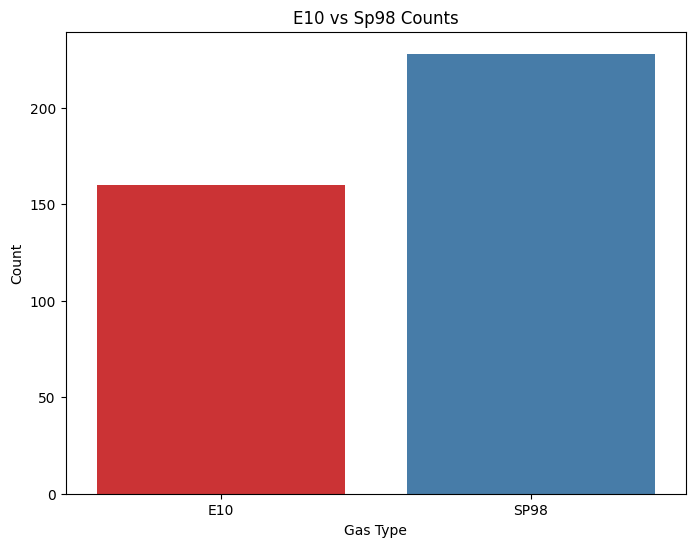

In [24]:
palette = sns.color_palette("Set1", n_colors=len(data['gas_type'].unique()))

plt.figure(figsize=(8, 6))
sns.countplot(x=data.gas_type, palette=palette, hue=data.gas_type, legend=False)
plt.title('E10 vs Sp98 Counts')
plt.xlabel('Gas Type')
plt.ylabel('Count')
plt.show()

## We see that more trips historically used SP98 fuel

In [25]:
# We need to split numericals and categoricals
def split_data(df):
    cat_from_num = df.select_dtypes("number").loc[:, df.select_dtypes("number").nunique() < 20]
    df_categorical = pd.concat([df.select_dtypes("object"), cat_from_num ], axis=1)
    df_categorical = df_categorical.astype(str) # convert to object type for printing
    df_numerical = df.drop(df_categorical.columns, axis=1)

    return df_numerical, df_categorical

data_num, data_cat = split_data(data)

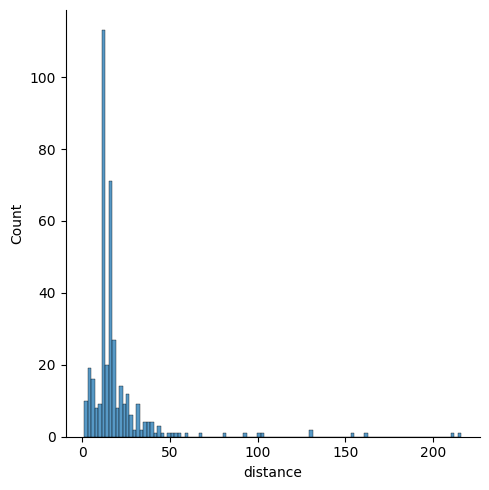

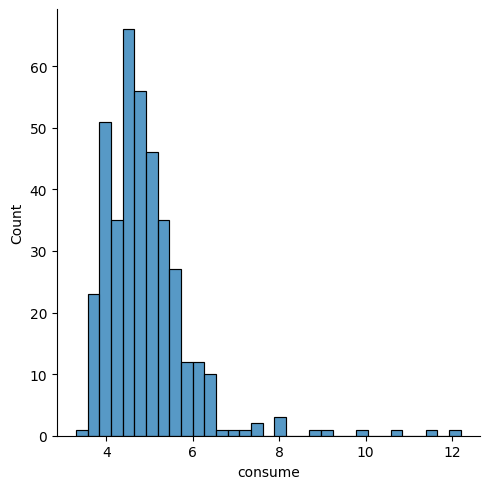

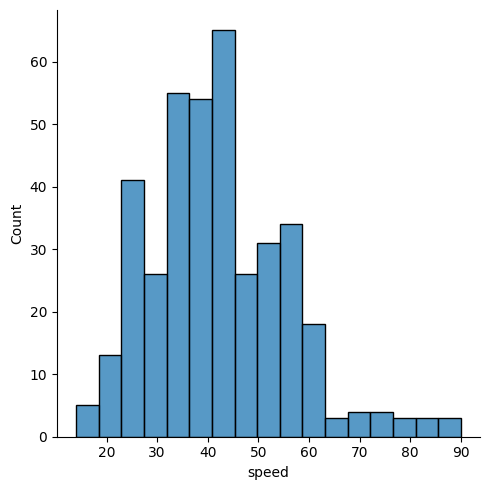

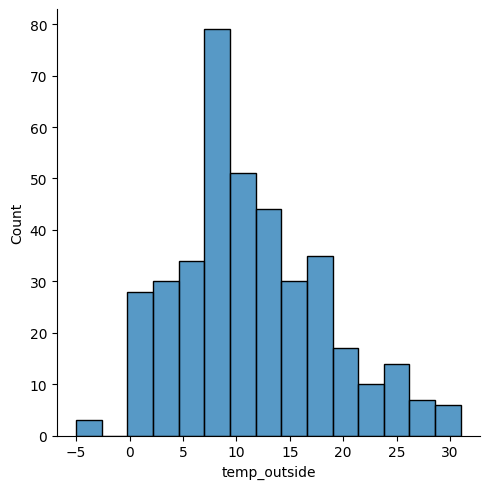

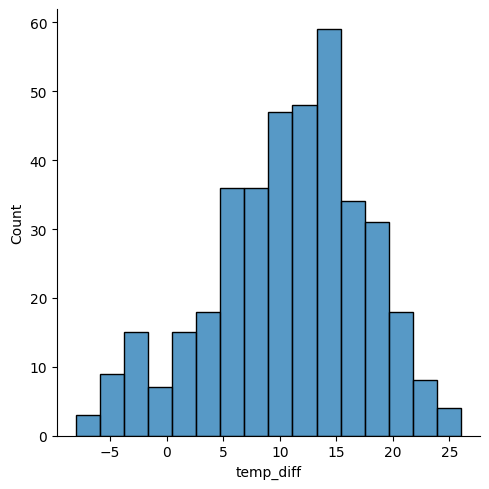

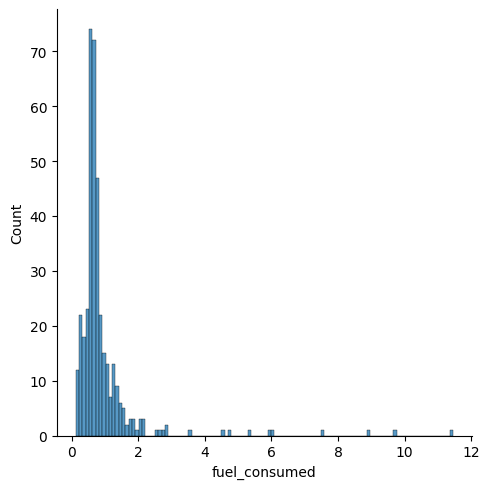

In [26]:
for col in data_num.columns:
    sns.displot(data_num[col])
    plt.show()

### Going over the distributions for the numerical columns

[Text(0.5, 1.0, 'SP98'),
 Text(0.5, 0, 'Trip Distance'),
 Text(0, 0.5, 'Number of Trips')]

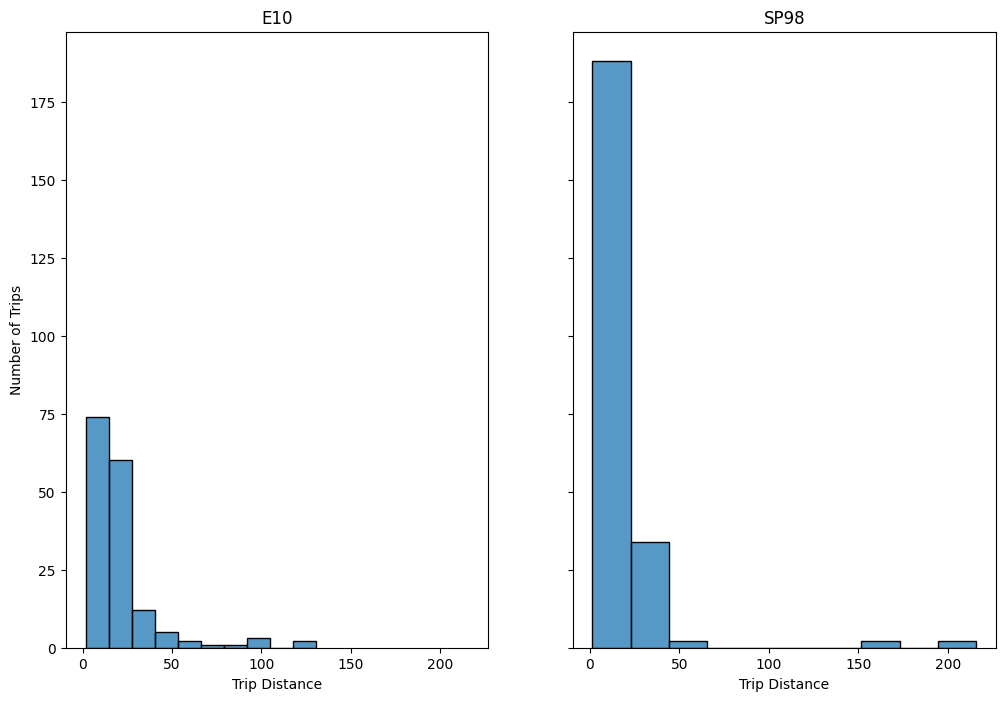

In [29]:
fig, axes = plt.subplots(1,2, figsize=(12,8), sharex=True, sharey=True)

gas_1 = data[data.gas_type == 'E10']
gas_2 = data[data.gas_type == 'SP98']

sns.histplot(ax=axes[0], data=gas_1.distance, bins=10, label='E10')
axes[0].set(title='E10', xlabel='Trip Distance', ylabel="Number of Trips")

sns.histplot(ax=axes[1], data=gas_2.distance, bins=10, label='SP98')
axes[1].set(title='SP98', xlabel='Trip Distance', ylabel="Number of Trips")

### Above graph is number of trips and distance traveled for each gas type:
Note: we see that SP98 was more heavily used for shorter trips but had been used for greater distrance trips than E10

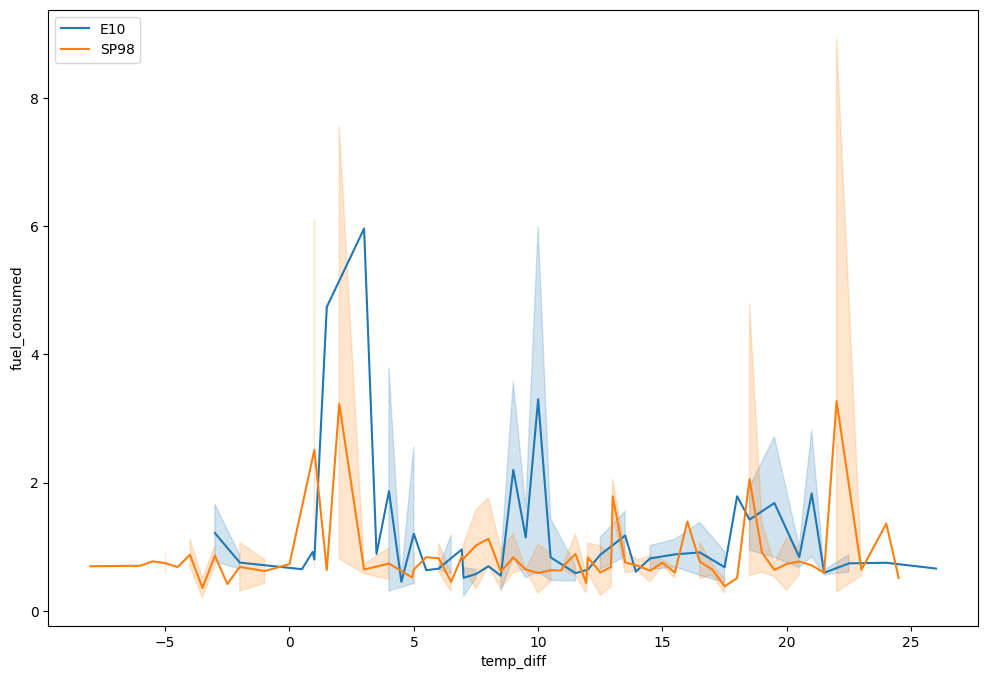

In [31]:
fig, ax = plt.subplots(figsize=(12,8))

sns.lineplot(data=gas_1, x='temp_diff', y='fuel_consumed', label='E10')
sns.lineplot(data=gas_2, x='temp_diff', y='fuel_consumed', label='SP98')

plt.legend(loc='upper left')


### Shows amount of fuel used for each gas type, depending on temperature difference between inside the car and the outside environment

Note: diff < 0 means car inside was cooler than outside, and vice versa
- We see e10 more consistently consuming more gas between 0 and 10, with SP98 consuming more at 20 - 25

[Text(0.5, 1.0, 'SP98'),
 Text(0.5, 0, 'refill in liters'),
 Text(0, 0.5, 'Number of Trips')]

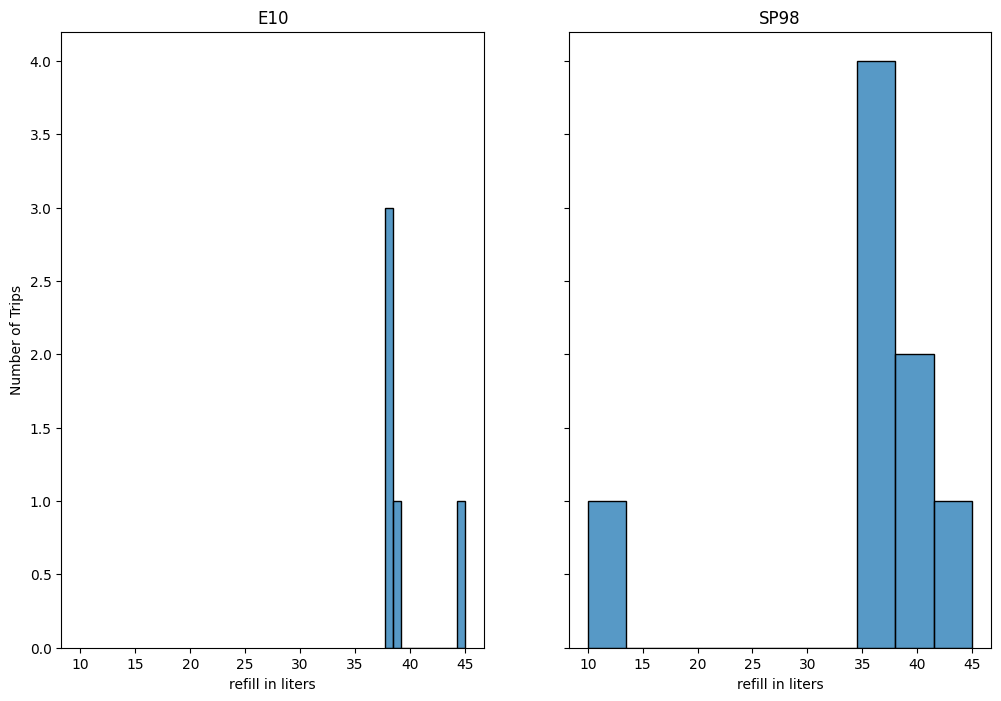

In [39]:
gas_1_refills = gas_1[gas_1['refill_liters'] != 0.0]
gas_2_refills = gas_2[gas_2['refill_liters'] != 0.0]

fig, axes = plt.subplots(1,2, figsize=(12,8), sharex=True, sharey=True)


sns.histplot(ax=axes[0], data=gas_1_refills.refill_liters, bins=10, label='E10')
axes[0].set(title='E10', xlabel='refill in liters', ylabel="Number of Trips")

sns.histplot(ax=axes[1], data=gas_2_refills.refill_liters, bins=10, label='SP98')
axes[1].set(title='SP98', xlabel='refill in liters', ylabel="Number of Trips")

## Showing how much gas was refilled for each type
### Note: e10 has an outlier where gas was refilled only ~10 liters

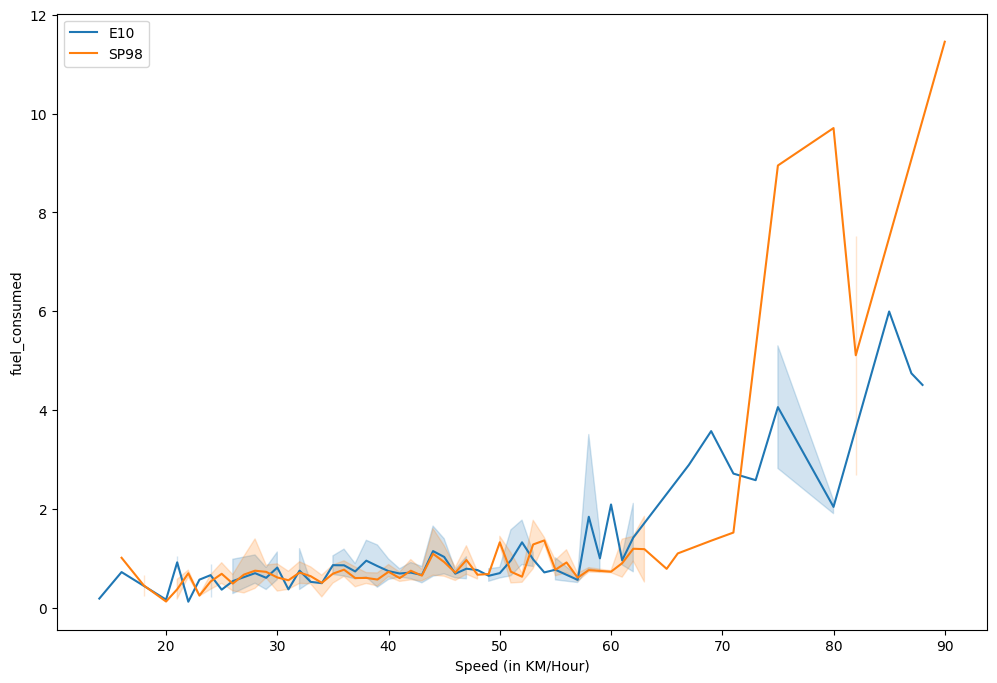

In [41]:
fig, ax = plt.subplots(figsize=(12,8))

sns.lineplot(data=gas_1, x='speed', y='fuel_consumed', label='E10')
sns.lineplot(data=gas_2, x='speed', y='fuel_consumed', label='SP98')

plt.xlabel('Speed (in KM/Hour)')
plt.legend(loc='upper left')

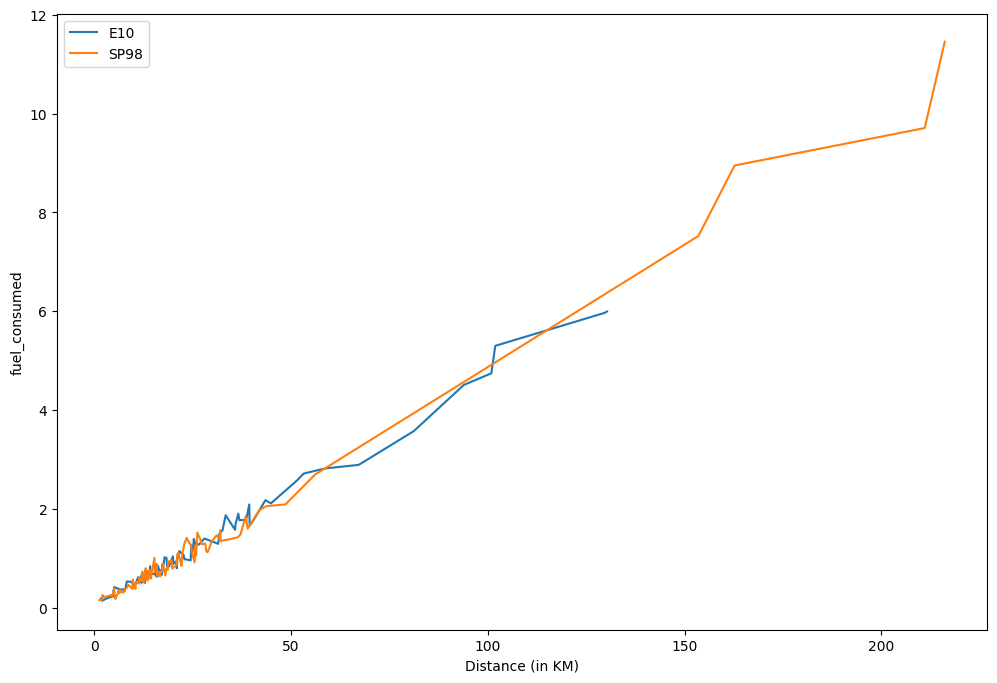

In [46]:
fig, ax = plt.subplots(figsize=(12,8))

sns.lineplot(data=gas_1, x='distance', y='fuel_consumed', label='E10')
sns.lineplot(data=gas_2, x='distance', y='fuel_consumed', label='SP98')

plt.xlabel('Distance (in KM)')
plt.legend(loc='upper left')

### Shows amount of fuel used based on avg speed of trip
We note that SP98 consumes more gas than E10 when speed is 70+ km per hour

## Conclusion and insigts
- We see that E10 fuel is better for more extreme cold temperatures while SP98 for less extreme weather
    - Note however, we do not see much data on negative side, so we should get data for summer months when car would need to be cooler inside to see how both stack up

- We see that at E10 is more fuel efficient at higher speeds (probably when on highways)

- We see that there isn't much difference in fuel economy for short distances or quick trips

### Onto Predictions Notebook